In [52]:
import os
import sys
import csv
import pickle

import numpy as np
import scipy
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt

import phate
import scprep
import graphtools as gt

import nibabel as nib
import nilearn.plotting
import nilearn.image
import nilearn.input_data

In [53]:
file_folder_path = '/gpfs/milgram/scratch60/turk-browne/tw496/results/'

folder = 'studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half'

file_name = 'early_visual_studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half_model_on_2half_data_e4000.npy'

save_folder = f'/home/tw496/fMRI_AE/results'
save_name = f'{file_name[:-4]}.png'

embeds = np.load(os.path.join(file_folder_path, folder, file_name))

In [54]:
n_pt, ts, hidden_dim = embeds.shape

In [55]:
embeds = embeds.reshape(-1, hidden_dim)

In [56]:
phate_op = phate.PHATE(n_components=2, n_jobs=-1)
phate_emb = phate_op.fit_transform(embeds)

Calculating PHATE...
  Running PHATE on 26985 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 48.95 seconds.
    Calculating affinities...
    Calculated affinities in 10.69 seconds.
  Calculated graph and diffusion operator in 59.69 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.96 seconds.
    Calculating KMeans...
    Calculated KMeans in 63.98 seconds.
  Calculated landmark operator in 69.05 seconds.
  Calculating optimal t...
    Automatically selected t = 25
  Calculated optimal t in 15.36 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 23.41 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.57 seconds.
Calculated PHATE in 173.09 seconds.


In [57]:
n_embeds_per_pt = phate_emb.shape[0] // n_pt

pid_labels = []

# for i in range(1, 15):
for i in [1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 17, 18, 19, 20]:
    pid_labels.extend([i] * n_embeds_per_pt)
pid_labels = np.array(pid_labels)

assert(len(pid_labels) == phate_emb.shape[0])

time_labels = []
for i in range(15):
    time_labels.extend([i for i in range(n_embeds_per_pt)])
time_labels = np.array(time_labels)

assert(len(time_labels) == phate_emb.shape[0])

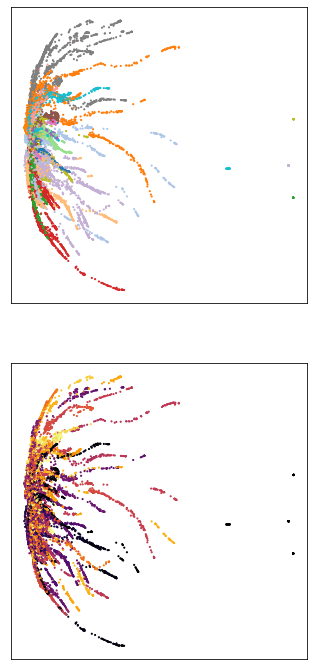

In [58]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(figsize=(12,12), nrows=2, ncols=1)
scprep.plot.scatter2d(phate_emb, ax=axs[0], c=pid_labels, discrete=True, ticks=False, legend=False)
scprep.plot.scatter2d(phate_emb, ax=axs[1], c=time_labels, discrete=False, ticks=False, legend=False)

axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)

plt.savefig(os.path.join(save_folder, save_name))
plt.savefig(os.path.join(file_folder_path, save_name))
plt.show()

### time_segment_matching

In [43]:
from lib.utils_Erica import time_segment_matching

In [60]:
file_folder_path = '/gpfs/milgram/scratch60/turk-browne/tw496/results/'

folder = 'studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half'

file_name = 'early_visual_studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half_model_on_2half_data_e4000.npy'

embeds = np.load(os.path.join(file_folder_path, folder, file_name))

In [61]:
embeds.shape

(15, 1799, 64)

In [62]:
accuracy=time_segment_matching(embeds)

In [63]:
np.mean(accuracy)

0.0037264766163592326

### inter-subject correlation

In [64]:
from lib.utils_Erica import ISC

file_folder_path = '/gpfs/milgram/scratch60/turk-browne/tw496/results/'

folder = 'studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half'

file_name = 'early_visual_studyforrest_viz_15pt_hiddendim64_bs256_mlp_AE_mse_reg_lam0.01_dec1_shf_1half_model_on_2half_data_e4000.npy'

embeds = np.load(os.path.join(file_folder_path, folder, file_name))

In [65]:
isc=ISC(embeds)

In [66]:
np.mean(isc)

0.05822820842077357